#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split

#### Challenge 1 : Check the current working directory status

In [2]:
os.getcwd()

'e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\notebook'

#### Challenge 2: set the working directory to correct directory

In [3]:
#### As it shows the wrong directory

os.chdir('e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset')
os.getcwd()

'e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset'

#### Extract the data from XML Annotations and image files

### Challenge 3: copy both files in one common folder

In [4]:
#### In our dataset we have images folder and Annotations folder
## but we want both in one common folder so for that

## Now, we copied both files in one common folder

import xml.etree.ElementTree as xet
from glob import glob

#### Create XML path

In [5]:
xml_path = os.path.join(os.getcwd(), 'common', '*xml')
path = glob(xml_path)

## Data Extraction and XML Parsing

**Step 1** : we have to parse the file

**Step 2** : find the root node for this xml tree

**Step 3**: find the first targeted tag then, we have to find the 2nd targeted tag

**Step 4:** Now, after finding the` filenames, xmax, amin, ymax and ymin` we have to save them in a dictionary because then we convert it into a dataframe or csv file.

**Step 5:** As of now, we find the `xmax, xmin, ymax and ymin` but we don't have the image filename, find it and insert.

In [6]:
# Let's create a dictionary which have certain list as values, filepath=[], xmin[], xmax[], ymin[], ymax[]

label_dict = dict(filepath=[], xmin=[], xmax=[], ymin=[], ymax=[])

for file in path:
    data = xet.parse(file)
    root = data.getroot()
    object = root.find('object')
    bnd_boxtag = object.find('bndbox')
    
    x_min = int(bnd_boxtag.find('xmin').text)
    x_max = int(bnd_boxtag.find('xmax').text)
    y_min = int(bnd_boxtag.find('ymin').text)
    y_max = int(bnd_boxtag.find('ymax').text)
    
    # Appending extracted coordinates into a dictonary
    
    label_dict['filepath'].append(file)
    label_dict['xmin'].append(x_min)
    label_dict['xmax'].append(x_max)
    label_dict['ymin'].append(y_min)
    label_dict['ymax'].append(y_max)

#### Converted Extracted XML data into a dataframe

In [7]:
df = pd.DataFrame(label_dict)
df.to_csv('labels.csv', index=False)
df.head()

,filepath,xmin,xmax,ymin,ymax
0,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,226,419,125,173
1,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,134,262,128,160
2,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,140,303,5,148
3,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,175,214,114,131
4,e:\AnacondaWorkspace\resume\ineuron\Automatic_...,167,240,202,220


#### Extract respective image filename of XML and inserting it into a dataframe

In [8]:
def get_filename(filename):
    image_filename = xet.parse(filename).getroot().find('filename').text
    image_filepath = os.path.join(os.getcwd(), 'common', image_filename)
    return image_filepath 

In [9]:
image_path = list(df['filepath'].apply(get_filename))

### Show any random image of a Car: 
> Example :let's image_path as 100

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from IPython.display import Image
from PIL import Image, ImageDraw

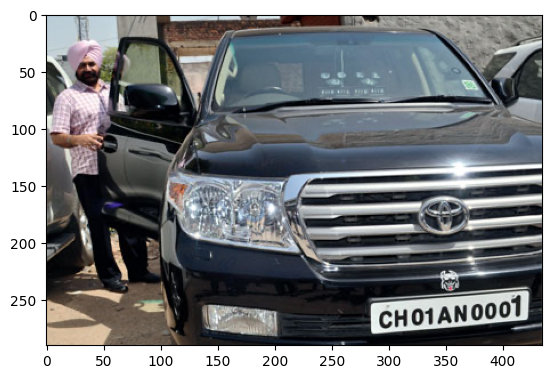

In [11]:
ORIGINAL_IMG = mpimg.imread(image_path[100]) # random image
plt.imshow(ORIGINAL_IMG)

Image location and it's Cars<number?>

In [12]:
image_path[100]

'e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset\\common\\Cars189.png'

image location: 'e:\\AnacondaWorkspace\\resume\\ineuron\\Automatic_Number_Plate_Recognition_Project\\Dataset\\common\\'

Cars<number?>: 189

### Detecting the number plate of the car

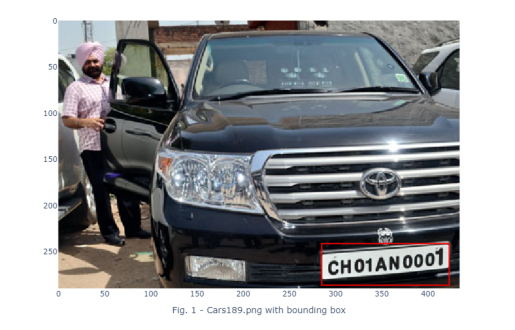

In [13]:
# 1. Define the file path

image_path_ = image_path[100]
detected_number_plate = image_path_

# 2. Read the image using plotly

detected_number_plate_img = io.imread(detected_number_plate)

# 3. Define the coordinates;

x_min = 285
y_min = 241
x_max = 423
y_max = 286

# 4. Create the plotly figure and add the rectangle shape

fig = px.imshow(detected_number_plate_img)
fig.update_layout(width=800, height=500, margin=dict(l=10, r=10, b=10, t=10), xaxis_title='Fig. 1 - Cars189.png with bounding box')
fig.add_shape(type='rect', x0=x_min, x1=x_max, y0=y_min , y1=y_max, xref='x', yref='y', line_color='red')

# 5. Save the figure to an image file
image_filepath = os.path.join(os.getcwd(), 'Test', 'test_image.png')

# 6. Use the correct method to write the image
fig.write_image(image_filepath, engine='kaleido')

# 7. Display the saved image
img=mpimg.imread(image_filepath)
plt.imshow(img)
plt.axis('off')
plt.show()

# Data Preprocessing

- Each image we will convert into an array using OpenCV
- Each image will be resize into (224, 224) because it is the standard compatible size of pre-trained transfer learning mdel i.e., Inceprion Resnet V2
- Normalizing the image by dividing with maximum number i.e., 255 (max. no. for 8-bit images) and the process is called normalization (Min-Max Scaler)
- Need to normalize the labels too because for Deep Learning model output range should be 0 to 1. For normalizing the labels I use to divide  the diagonal points with width and height of image.

In [14]:
# importing library

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Creating some required variables and list

labels = df.iloc[:, 1:].values
output = []
data = []

# looping over each image

for index in range(len(image_path)):
    
    # image path
    
    image = image_path[index]
    
    # 1. Image to array
    
    image_array = cv2.imread(image)
    height, width, depth = image_array.shape


    # 2. Resizing image to (224, 224)
    
    load_image = load_img(image, target_size = (224, 224))
    load_image_array = img_to_array(load_image)


    # 3. Normalize image
    
    normalized_load_image_array = load_image_array/255.0


    # 4. Normalize labels
    
    xmin, xmax, ymin, ymax = labels[index]
    normalized_xmin, normalized_xmax = xmin/width, xmax/width
    normalized_ymin, normalized_ymax = ymin/height, ymax/height
    normalized_label = (normalized_xmin, normalized_xmax, normalized_ymin, normalized_ymax)

    # 5. Appending Outputs and Data
    
    data.append(normalized_load_image_array)
    output.append(normalized_label)

#### Split Data into train and test

In [15]:
X = np.array(data, dtype = np.float32)
y = np.array(output, dtype = np.float32)

x_train, x_test, y_train, y_test = train_test_split(X, y,  train_size=0.8, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((346, 224, 224, 3), (87, 224, 224, 3), (346, 4), (87, 4))

#### Prepare Base Model

- A pre-trained model has been previously trained on a dataset contains the weights and baises that represent the features of whichever dataset it was trained on.

- InceptionResNetV2, is a convolutional neural network that is trained on more that a million images from the ImageNet dataset.

In [17]:
# import libraries required

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

In [18]:
inception_model = InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
output_model = inception_model.output
output_model = Flatten()(output_model)
output_model = Dense(500, activation='relu')(output_model)
output_model = Dense(250, activation='relu')(output_model)
output_model = Dense(4, activation = 'sigmoid')(output_model)

219055592/219055592 [==============================] - 35s 0us/step


In [19]:
model = Model(inputs = inception_model.input, outputs=output_model)

### Compile our Model

In [21]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

### Model Summary

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             